In [132]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.special import factorial

In [133]:
conHeuristica = pd.read_csv('ej1CONHEURISTICA.csv')

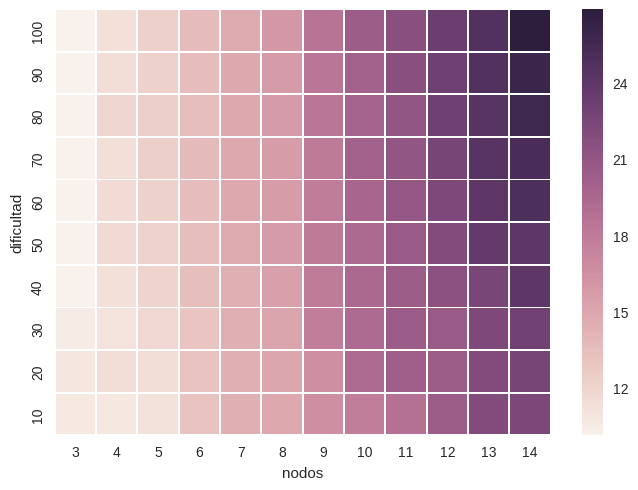

In [134]:
#flights_long = sns.load_dataset("flights")
conHeuristica["nodos"] = conHeuristica["gimnasios"] + conHeuristica["paradas"]
conHeuristica["tiempoLog"] = np.log(conHeuristica["tiempo"])
conHeuristicaLog = conHeuristica.pivot("dificultad", "nodos", "tiempoLog")
ax1 = sns.heatmap(conHeuristicaLog, annot=False, linewidths=.5)
ax1.invert_yaxis()
plt.show()

In [135]:
sinHeuristica = pd.read_csv('ej1SINHEURISTICA.csv', dtype={"paradas": int, "gimnasios": int})

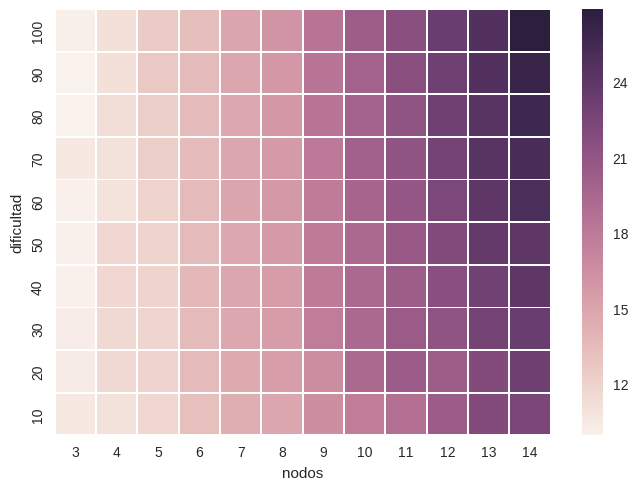

In [136]:
sinHeuristica["nodos"] = sinHeuristica["gimnasios"] + sinHeuristica["paradas"]
sinHeuristica["tiempoLog"] = np.log(sinHeuristica["tiempo"])
sinHeuristicaLog = sinHeuristica.pivot("dificultad", "nodos", "tiempoLog")
ax2 = sns.heatmap(sinHeuristicaLog, annot=False, linewidths=.5)
ax2.invert_yaxis()
plt.show()

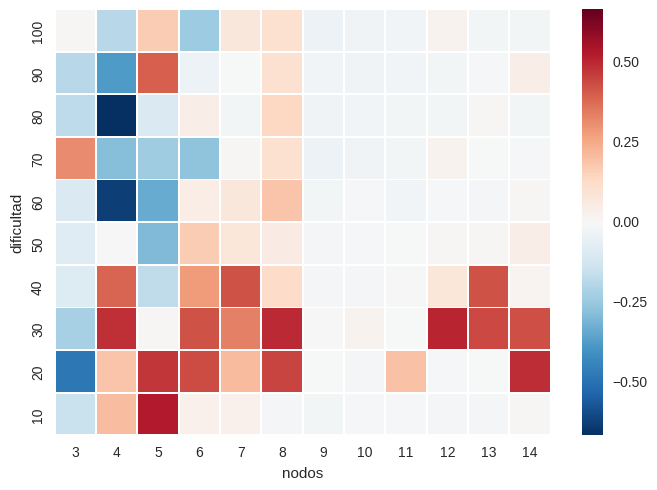

In [137]:

sinHeuristica["tiemposRestados"] = sinHeuristica["tiempoLog"] - conHeuristica["tiempoLog"]
diferencia = sinHeuristica.pivot("dificultad", "nodos", "tiemposRestados")
ax3 = sns.heatmap(diferencia, annot=False, linewidths=.5)
ax3.invert_yaxis()
plt.show()

/home/javito/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/javito/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


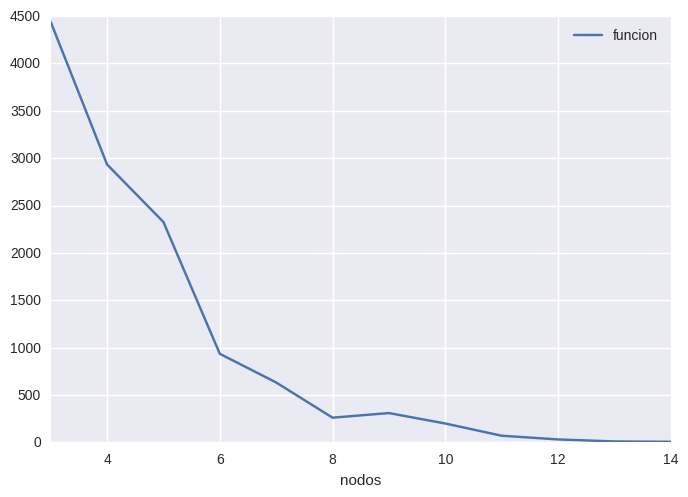

In [138]:
sinHeuristicaFiltrado = sinHeuristica[(sinHeuristica["dificultad"] == 100)]
sinHeuristicaFiltrado["factorial"] = factorial(sinHeuristicaFiltrado["nodos"], exact=True)
sinHeuristicaFiltrado["funcion"] = sinHeuristicaFiltrado["tiempo"]/sinHeuristicaFiltrado["factorial"]
#rectaComplejidad = sinHeuristicaFiltrado.pivot("funcion", "nodos")
#sns.plotline(rectaComplejidad)
sinHeuristicaFiltrado.plot(x="nodos", y="funcion")
#ax.sinHeuristicaFiltrado.plot(x="nodos", y="factorial")
ax.set_yscale('log')
plt.show()